In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

plt.rcParams["figure.figsize"] = [12, 10]
plt.rcParams["figure.autolayout"] = False

In [2]:
def rotate_data(x_data, y_data, angle):
    """
    Angle should be given in degrees"""
    x_prime = []
    y_prime = []
    theta = np.radians(angle)
    for x, y in zip(x_data, y_data):
        c, s = np.cos(-theta), np.sin(-theta)
        j = np.matrix([[c, s], [-s, c]])
        m = np.dot(j, [x, y])
        x_prime.append(float(m.T[0]))
        y_prime.append(float(m.T[1]))

    #
    return np.array(x_prime), np.array(y_prime)

In [9]:
def sine_wave(x, A=1, wavelength=1, shift=0, intercept=0):
    return A*np.sin((x - shift)*2*math.pi/wavelength) + intercept

In [4]:
def clip_function(x, y, width, height):
    x[x <= -width/2] = np.nan
    x[x >= width/2] = np.nan

    y[y >= height/2] = np.nan
    y[y <= -height/2] = np.nan
    
    return x, y

In [99]:
np.random.binomial(1, 0.5)

1

In [100]:
def rotate_and_draw(width, height, angle, A, wavelength, shift, step_size=0.1, zorder=1):
    # Create the X range
    xrange = np.arange(-width, width, 0.1)
    # Create the function
    f_x = sine_wave(xrange, A=A, wavelength=wavelength, shift=shift)
    # Rotate range and function
    x_rot, y_rot = rotate_data(xrange, f_x, angle)
    # Clip outside of bounding box
    x_rot, y_rot = clip_function(x_rot, y_rot, width, height)
    
    heads = np.random.binomial(1, 0.5)
    c = 'r' if heads else 'b'
    
    plt.plot(x_rot, y_rot, color=c, zorder=zorder)

In [27]:
def plot_box_and_sines(width, height, angle, amplitude, wavelength, sigma_angle=0, sigma_amplitude=0,
                       sigma_wavelength=0, sigma_shift=0, n=1, zorder=1):
    # Create background and border
    rect_fill = plt.Rectangle((-width/2, -height/2), width, height, color='w', fill=True, zorder=zorder)
    ax.add_artist(rect_fill)
    rect_border = plt.Rectangle((-width/2, -height/2), width, height, color='k', fill=False, zorder=zorder)
    ax.add_artist(rect_border)

    angles = np.random.normal(angle, sigma_angle, n)
    amplitudes = np.random.normal(amplitude, sigma_amplitude, n)
    wavelength = np.random.normal(wavelength, sigma_wavelength, n)
    spreads = np.random.normal(0, sigma_shift, n)
    
    for ang, amp, wvl, spr in zip(angles, amplitudes, wavelength, spreads):
        rotate_and_draw(width, height, ang, amp, wvl, spr, zorder=zorder+1)

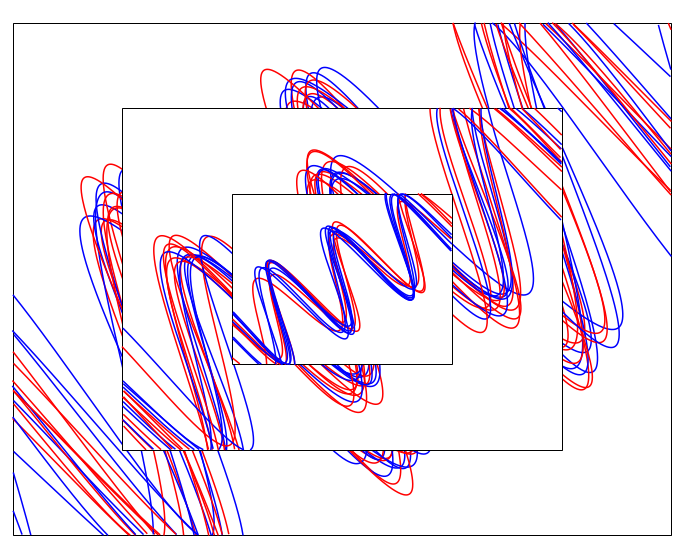

In [173]:
xmin = -60
xmax = 60
ymin = -50
ymax = 50

# Set the axis
figure, ax = plt.subplots()
ax.set_xlim((xmin - 1, xmax + 1))
ax.set_ylim((ymin - 1, ymax + 1))


# Box C
width_c = 120
height_c = 96
angle_c = 30
amplitude_c = 35
wavelength_c = 40
n_c = 15
plot_box_and_sines(width_c, height_c, 
                   angle_c, amplitude_c, wavelength_c, 
                   sigma_angle=3, sigma_amplitude=3, sigma_wavelength=3, sigma_shift=3, 
                   n=n_c, zorder=1)

# Box B
width_b = 80
height_b = 64
angle_b = 30
amplitude_b = 20
wavelength_b = 30
n_b = 15
plot_box_and_sines(width_b, height_b, 
                   angle_b, amplitude_b, wavelength_b, 
                   sigma_angle=2, sigma_amplitude=2, sigma_wavelength=2, sigma_shift=2, 
                   n=n_b, zorder=3)

# Box A
width_a = 40
height_a = 32
angle_a = 30
amplitude_a = 10
wavelength_a = 14
n_a = 10
plot_box_and_sines(width_a, height_a, 
                   angle_a, amplitude_a, wavelength_a, 
                   sigma_angle=1, sigma_amplitude=1, sigma_wavelength=1, sigma_shift=1, 
                   n=n_a, zorder=5)


plt.axis('off')
#plt.grid(True, which='both')
plt.show()

In [152]:
figure.savefig("sines.svg", format='svg', dpi=400)  # dpi doesn't make a difference?
figure.savefig("sines.png", format='png', dpi=400)  # dpi doesn't make a difference?